# Wealth-in-Utility Additively with Consumption

The typical consumption-saving model assumes that agents derive a flow of utility from consumption each period, with additively separable utility across time. In `HARK.ConsumptionSaving.ConsWealthUtility` module, we change this assumption to allow wealth (end-of-period assets) to enter the agent's utility function directly.

This notebook concerns agents whose direct preferences for wealth are represented *additively* with consumption utility as a second CRRA term. For *multiplicative* direct preferences for wealth, see [the notebook for `WealthUtilityConsumerType`](./WealthUtilityConsumerType.ipynb) in the same module. The name of the `AgentType` subclass, and the model itself, is based on Johanna Francis' paper ["Wealth and the Capitalist Spirit"](https://www.sciencedirect.com/science/article/abs/pii/S0164070408000785).

In [1]:
# Import basic tools and our AgentType of interest
import numpy as np
import matplotlib.pyplot as plt
from time import time
from HARK.utilities import plot_funcs
from HARK.ConsumptionSaving.ConsWealthUtilityModel import CapitalistSpiritConsumerType

## Additive Wealth-in-Utility Consumption-Saving Model Statement

A `CapitalistSpiritConsumerType`'s problem can be expressed as:

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\CRRA}{\rho}$
$\newcommand{\LivPrb}{\mathsf{S}}$
$\newcommand{\PermGroFac}{\Gamma}$
$\newcommand{\Rfree}{\mathsf{R}}$
$\newcommand{\DiscFac}{\beta}$
$\newcommand{\CRRAwealth}{\nu}$
$\newcommand{\WealthCurve}{\hat{\CRRAwealth}}$
$\newcommand{\WealthFac}{\alpha}$
$\newcommand{\WealthShift}{\xi}$
$\newcommand{\cLvl}{C}$
$\newcommand{\mLvl}{M}$
$\newcommand{\aLvl}{A}$

\begin{eqnarray*}
V_t(\mLvl_t,p_t) &=& \max_{\cLvl_t} ~~ U(\cLvl_t, \aLvl_t) + \beta \LivPrb_t \mathbb{E}_{t} [v_{t+1}(\mLvl_{t+1}, p_{t+1})] ~~ \text{s.t.}\\
\aLvl_t &=& \mLvl_t - \cLvl_t, \\
\aLvl_t &\geq& \underline{a} \cdot p_t, \\
\mLvl_{t+1} &=& \Rfree \aLvl_t + \theta_{t+1}, \\
p_{t+1} &=& G_{t+1}(p_t)\psi_{t+1}, \\
\psi_t \sim F_{\psi_t} &\qquad&  \theta_t \sim F_{\theta_t}, \\
\mathbb{E} [F_{\psi_t}] &=& 1, \\
U(\cLvl, \aLvl) &=& \frac{\cLvl^{1-\CRRA}}{1-\CRRA} + \WealthFac \frac{(\aLvl + \WealthShift)^{1-\CRRAwealth}}{1-\CRRAwealth}, ~~~ \CRRAwealth = \CRRA \cdot \WealthCurve.
\end{eqnarray*}

This model is identical to that of [`GenIncProcessConsumerType`](../ConsGenIncProcessModel/GenIncProcessConsumerType.ipynb) except for an addition to the utility function, which now depends on both consumption $\cLvl_t$ and end-of-period wealth $\aLvl_t$.

In the "capitalist spirit" model, wealth enters utility directly as a second CRRA term, additive with utility of consumption. This term has a risk aversion coefficient of $\CRRAwealth < \CRRA$ (or more precisely $\WealthCurve \in (0,1)$), which generates luxury preferences for wealth accumulation: wealthier agents want to acquire *even more* wealth, and the saving rate will tend toward 100% as wealth becomes arbitrarily large.

## Solving the Additive Wealth-in-Utility Model

Whereas the `WealthUtilityConsumerType` was represented with a permanent-income-normalized problem, building from the workhorse `IndShockConsumerType`, the `CapitalistSpiritConsumerType`'s model is *not* normalized by permanent income. Indeed, the intent of this model is that preferences are *not* homothetic with respect to income, and richer agents will want to accumulate (proportionally) more wealth.

Luckily, this model is actually much more straightforward to solve than the `WealthUtilityConsumerType` model. Following the EGM logic used throughout HARK, define end-of-period (or continuation) value as:

\begin{equation*}
\mathfrak{V}_t(\aLvl_t, p_t) \equiv \beta \LivPrb_t \mathbb{E}_{t} [V_{t+1}(\Rfree \aLvl_t + \theta_{t+1}, G_{t+1}(p_t)\psi_{t+1})].
\end{equation*}

Likewise, end-of-period marginal value of assets is:

\begin{equation*}
\mathfrak{V}^\aLvl_t(\aLvl_t, p_t) \equiv \beta \Rfree \LivPrb_t \mathbb{E}_{t} [V^\mLvl_{t+1}(R \aLvl_t + \theta_{t+1}, G_{t+1}(p_t)\psi_{t+1})].
\end{equation*}

The first order condition for optimal consumption can then be expressed in EGM form as:

\begin{equation*}
\cLvl_t^{-\CRRA} - \WealthFac (\aLvl_t + \WealthShift)^{-\CRRAwealth} - \mathfrak{V}^\aLvl_t(\aLvl_t, p_t) = 0 \Longrightarrow \cLvl_t = \left( \WealthFac (\aLvl_t + \WealthShift)^{-\CRRAwealth} + \mathfrak{V}^\aLvl_t(\aLvl_t, p_t) \right)^{-1/\CRRA}.
\end{equation*}

Thus the "capitalist spirit" model is barely more complex to solve than its parent `GenIncProcessModel`-- just an additional closed form term is added to the marginal value of wealth before applying the inverse marginal utility function. More broadly, `GenIncProcess` is the "capitalist spirit" model with $\WealthFac = 0$-- the agent puts zero relative utility weight on their assets.

The remainder of the solution method proceeds as usual for HARK and EGM, so we won't further elaborate on it here.

## Example Parameter Values to Make a `CapitalistSpiritConsumerType`

Most of the parameters and objects required to specify and solve a `CapitalistSpiritConsumerType` are shared with the `GenIncProcessConsumerType`, with only a few simple parameters added.

| Param | Description | Code | Value | Constructed |
| :---: | --- | --- | --- | :---: |
| $\DiscFac$ | Intertemporal discount factor  | `DiscFac` | 0.96 | |
| $\CRRA$ | Coefficient of relative risk aversion | `CRRA` | 2.0 | |
| $\WealthFac$ | Scaling factor for relative preference for wealth  | `WealthFac` | 1.0 | |
| $\WealthCurve$ | Risk aversion for wealth as compared to consumption (must be in $(0,1)$)  | `WealthCurve` | 0.8 | |
| $\WealthShift$ | Additive shifter for wealth in utility function  | `WealthShift` | 4.0 | |
| $\Rfree_t$ | Risk free interest factor | `Rfree` | [1.03] | |
| $\LivPrb_t$ |Survival probability | `LivPrb` | [0.98] | |
| $\underline{a}$ |Artificial borrowing constraint, as factor of permanent income | `BoroCnstArt` | 0.0 | |
| $(none)$ |Indicator for whether `vFunc` should be computed | `vFuncBool` | True | |
| $(none)$ |Indicator for whether `cFunc` should use cubic splines | `CubicBool` | False |  |
|$F_t$ | Joint distribution of permanent and transitory income shocks | `IncomeDstn` | - |$\surd$ |
| $G_t$ | Expected persistent income next period as a function of this period's level | `pLvlNextFunc` | - | $\surd$ |
| $(none)$ | Array of persistent income levels | `pLvlGrid` | - |$\surd$ |
| $(none)$ | Array of end-of-period assets above minimum | `aXtraGrid` | - |$\surd$ |

### Constructed Inputs for `CapitalistSpiritConsumerType`

The default constructors for `CapitalistSpiritConsumerType` are identical to those for `PersistentShockConsumerType`:

- `IncShkDstn` is constructed with `construct_lognormal_income_process_unemployment`, using parameters like `PermShkStd`, `PermShkCount`, `TranShkStd`, `TranShkCount`, `IncUnemp`, and `UnempPrb`. This is the standard income shock distribution constructor throughout HARK.

- `aXtraGrid` is constructed with `make_assets_grid`, as in most other HARK models, and represents *normalized* asset levels; i.e. it is rescaled by permanent income for each $p_t$ in `pLvlGrid` when solving the model

- `pLvlNextFunc` is constructed with `make_AR1_style_pLvlNextFunc`, with a default persistence coefficient of 0.98. Thus persistent income follows an AR(1) in logs, as for a `PersistentShockConsumerType`. When `cycles=1`, `PermGroFac` can be any life-cycle sequences of expected growth factors. When `cycles=0`, the model will only behave as expected when `PermGroFac=1.0`.

- `pLvlGrid` is constructed with `make_pLvlGrid_by_simulation`, which literally simulates a large number of $p_t$ sequences using `pLvlNextFunc`, `IncShkDstn`, and the initial distribution of permanent income specified in `pLvlInitDstn`. It then builds the (age-conditional) grid of persistent income levels based on the specified `pLvlPctiles`. Just as in `PersistentShockConsumerType`, this function is only compatible with `cycles=0` (infinite horizon) and `cycles=1` (lifecycle model).

## Example Implementations of `CapitalistSpiritConsumerType`

The default parameters for `CapitalistSpiritConsumerType` are fairly sensible and mostly copied from `GenIncProcessConsumerType`. Let's make an infinite horizon instance with otherwise default parameters, but increase income persistence to 99% from its default 98% (to increase the spread of permanent income levels).

For the parameters novel to this model, the defaults are `WealthFac = 1.0`, `WealthCurve = 0.8`, and `WealthShift = 0.0`. With default `CRRA = 2.0`, that means that $\CRRAwealth = 1.6$ by default for this `AgentType` subclass.

Just like for `PersistentShockConsumerType`, instantiating an infinite horizon `CapitalistSpiritConsumerType` takes a few seconds because the `pLvlGrid` is constructed by simulation over many periods.

In [2]:
def mystr(x):
    return "{:.4f}".format(x)

In [3]:
# Make an infinite horizon capitalist spirit type with otherwise default parameters
t0 = time()
SpiritType = CapitalistSpiritConsumerType(cycles=0, PrstIncCorr=0.99)
t1 = time()
print(
    "Instantiating an infinite horizon capitalist spirit consumer type took "
    + mystr(t1 - t0)
    + " seconds."
)

Instantiating an infinite horizon capitalist spirit consumer type took 10.0441 seconds.


In [4]:
# Solve the infinite horizon model
t0 = time()
SpiritType.solve()
t1 = time()
print(
    "Solving an infinite horizon capitalist spirit consumer type took "
    + mystr(t1 - t0)
    + " seconds."
)

Solving an infinite horizon capitalist spirit consumer type took 16.8751 seconds.


Like for other `AgentType` subclasses, let's plot the consumption function. For this model, we will plot it at each of the permanent income levels in `pLvlGrid`.

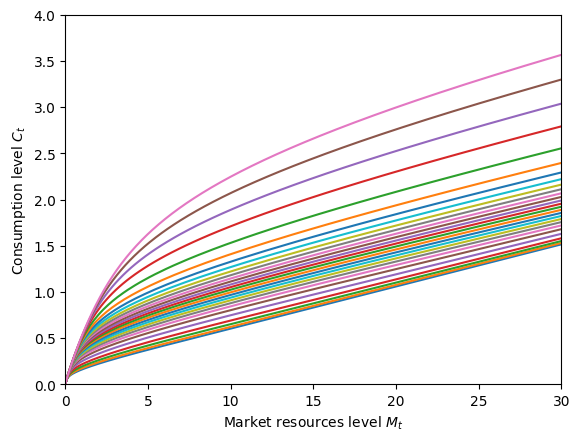

In [5]:
# Plot the consumption function by pLvl
SpiritType.unpack("cFunc")
plt.ylim(0.0, 4.0)
plt.xlabel(r"Market resources level $M_t$")
plt.ylabel(r"Consumption level $C_t$")
plot_funcs(SpiritType.cFunc[0].functions[0].func.xInterpolators, 0.0, 30.0)

Even though this agent is guaranteed to have positive income each period (under default parameters) and is liquidity constrained, they *never* choose to end the period with $A_t = 0$ in wealth, because this would yield negative infinite utility given their preferences.

To see how preferences are non-homothetic in this model, let's plot the *permanent income normalized* consumption functions. Because wealth accumulation is a luxury good, we should expect to see higher income agents consume *less* conditional on their market resources to permanent income ratio.

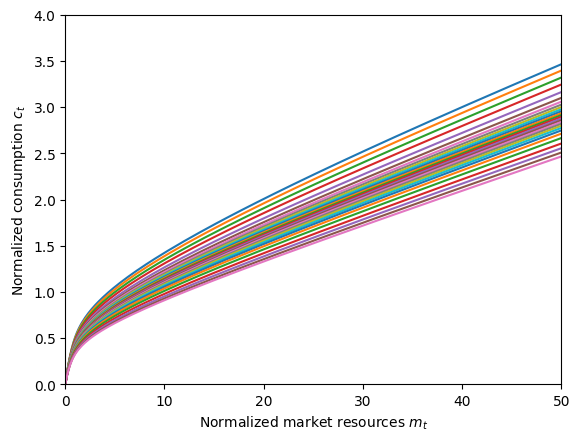

In [6]:
# Plot the normalized consumption functions by pLvl
pLvlGrid = SpiritType.pLvlGrid[0]
mNrm = np.linspace(0.0, 50.0, 301)
for j in range(pLvlGrid.size):
    pLvl = pLvlGrid[j]
    mLvl = pLvl * mNrm
    cLvl = SpiritType.cFunc[0].functions[0].func.xInterpolators[j](mLvl)
    cNrm = cLvl / pLvl
    plt.plot(mNrm, cNrm)
plt.ylim(0.0, 4.0)
plt.xlim(0.0, 50.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.show()

As expected, the highest permanent income level (pink) consumes the least *relative to* their normalized market resources. This is somewhat a product of permanent income being expected to fall for the richest agents and rise for the poorest, but the direct preference for wealth is a much larger contributor.

To see this, we can make the luxury effect of wealth even stronger by reducing `WealthCurve` from its default of 0.8 and resolving the model.

In [7]:
# Make and solve a capitalist spirit type that puts even more weight on wealth as they become richer
t0 = time()
LuxuryType = CapitalistSpiritConsumerType(
    cycles=0, WealthCurve=0.4, aXtraMax=150.0, aXtraCount=200
)
LuxuryType.solve()
t1 = time()
print("Making and solving that kind of agent took " + mystr(t1 - t0) + " seconds.")

Making and solving that kind of agent took 43.5113 seconds.


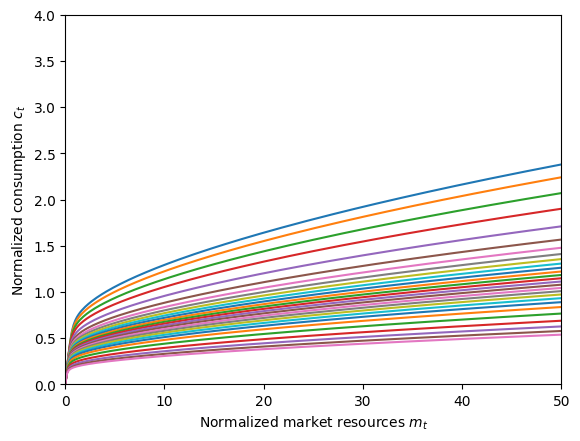

In [8]:
# Plot the normalized consumption functions by pLvl
LuxuryType.unpack("cFunc")
pLvlGrid = LuxuryType.pLvlGrid[0]
mNrm = np.linspace(0.0, 50.0, 301)
for j in range(pLvlGrid.size):
    pLvl = pLvlGrid[j]
    mLvl = pLvl * mNrm
    cLvl = LuxuryType.cFunc[0].functions[0].func.xInterpolators[j](mLvl)
    cNrm = cLvl / pLvl
    plt.plot(mNrm, cNrm)
plt.ylim(0.0, 4.0)
plt.xlim(0.0, 50.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.show()

Now you can really see the extreme dispersion in *normalized* consumption by permanent income level. A lower value of `WealthCurve` means that the CRRA for wealth $\CRRAwealth$ is lower compared to ordinary $\CRRA$. That means it has *less curvature*, so the marginal utility of wealth *decreases slower* than the marginal utility of consumption. Hence as consumption and wealth increase, the agent increasingly gets *relatively more* marginal utility from wealth than consumption, and they want to save even more than they already have.

Note that even though *normalized* consumption is lower for higher income agents (conditional on *normalized*) market resources, higher income consumers still consume more *in level* conditional on market resources *level*. Let's plot the non-normalized consumption functions to see that:

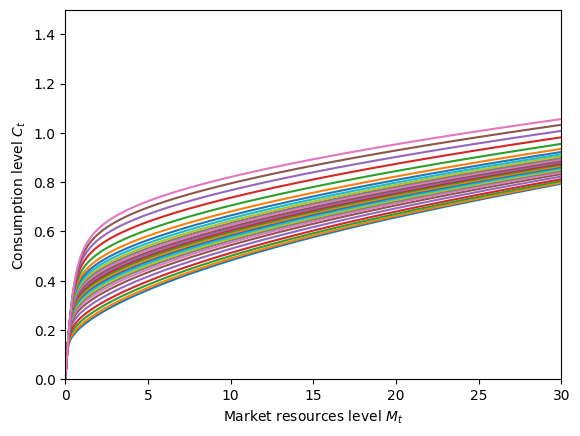

In [9]:
# Plot the consumption function by pLvl
plt.ylim(0.0, 1.5)
plt.xlabel(r"Market resources level $M_t$")
plt.ylabel(r"Consumption level $C_t$")
plot_funcs(LuxuryType.cFunc[0].functions[0].func.xInterpolators, 0.0, 30.0)

Note that we increased the upper bound of the `aXtraGrid` for this example. That's because we didn't want this figure to contradict our economic claim that consumption *level* is still increasing in $p_t$, holding $M_t$ fixed. Because the lowest value of $p_t$ in the `pLvlGrid` is so low, the consumption function at the lowest $p_t$ *would* overtake the consumption function elsewhere *due to linear extrapolation*.

In fact, if you simply increase the plotting boundaries of this figure, you'll get the consumption function to "flip" or "twist". This is just a product of linear extrapolation kicking in at different market resource *levels* by $p_t$, not a true feature of the consumption function!

Finally, let's look at the role of the `WealthShift` parameter, which is zero by default. If it is instead positive, then agents do *not* get negative infinte utility from ending the period with $A_t = 0$, and they will be willing to do so at low levels of market resources. This will make the luxury effect of wealth become active at higher wealth levels.

In [10]:
# Make a capitalist spirit consumer type with positive `WealthShift`
t0 = time()
ShiftType = CapitalistSpiritConsumerType(cycles=0, WealthShift=2.0, PrstIncCorr=0.99)
ShiftType.solve()
t1 = time()
print("Making and solving that agent took " + mystr(t1 - t0) + " seconds.")

Making and solving that agent took 22.8880 seconds.


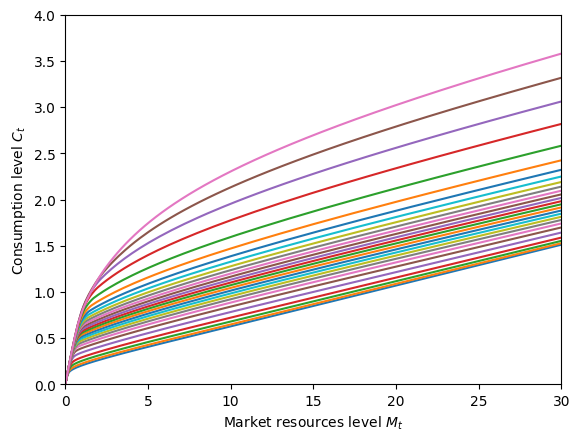

In [11]:
# Plot the consumption function by pLvl
ShiftType.unpack("cFunc")
plt.ylim(0.0, 4.0)
plt.xlabel(r"Market resources level $M_t$")
plt.ylabel(r"Consumption level $C_t$")
plot_funcs(ShiftType.cFunc[0].functions[0].func.xInterpolators, 0.0, 30.0)

Compare that consumption function to the very first one in this notebook and you'll see that the agent is *more willing to consume* at low levels of market resources.